In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

In [5]:
diab=pd.read_csv('C:\\Users\\LENOVO\\Documents\\DIABETESE_DATAANALYSIS\\PYTHON_FILE\\diabetes.csv') ## loading csv file
diab.isnull().sum()  ## checking for null/ missing data

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Implementation of the ML algorithms

We first split the data into testing and training

STRATIFICATION:
we stratify the data, so that it is well divided into testing and training. Hence, we have proportionate data for all the classes in both the training and testing data.

In [7]:
from sklearn.model_selection import train_test_split
outcome=diab['Outcome']
data=diab[diab.columns[:8]]
train,test=train_test_split(diab,test_size=0.25,random_state=0,stratify=diab['Outcome'])# stratify the outcome
train_X=train[train.columns[:8]]
test_X=test[test.columns[:8]]
train_Y=train['Outcome']
test_Y=test['Outcome']


We are using the following algorithms and testing the accuracy
1. SVM
2. K Nearest Neighbour
3. Decision tree
4. Logistic Regression


In [8]:
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.cross_validation import KFold
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


1 . SVM is being applied for both linear and gaussian kernels and C is taken as default


In [11]:
ker=['rbf','linear']
for i in ker:
    model=svm.SVC(kernel=i)
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    print('Accuracy for SVM kernel=',i,'is',metrics.accuracy_score(prediction,test_Y))

Accuracy for SVM kernel= rbf is 0.651041666667
Accuracy for SVM kernel= linear is 0.770833333333


4 . KNN is being applied

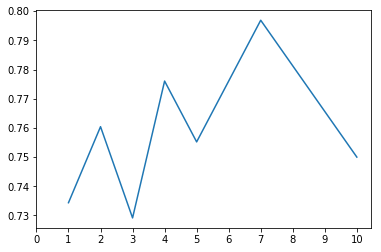

Accuracies for different values of n are: [ 0.734375    0.76041667  0.72916667  0.77604167  0.75520833  0.77604167
  0.796875    0.78125     0.765625    0.75      ]


In [16]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
plt.show()
print('Accuracies for different values of n are:',a.values)

3 . Decision Tree is being applied


In [14]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,test_Y))


The accuracy of the Decision Tree is 0.765625


2 . Logistic Regression is being applied

In [13]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_Y))

The accuracy of the Logistic Regression is 0.776041666667


OVERALL tabel for all accuracies

In [18]:
abc=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier()]
for i in models:
    model = i
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    abc.append(metrics.accuracy_score(prediction,test_Y))
models_dataframe=pd.DataFrame(abc,index=classifiers)   
models_dataframe.columns=['Accuracy']
models_dataframe

,Accuracy
Linear Svm,0.770833
Radial Svm,0.651042
Logistic Regression,0.776042
KNN,0.729167
Decision Tree,0.765625


Now we will try to improve accuracy by selecting important features, we can use random forest to do this.


In [19]:
from sklearn.ensemble import RandomForestClassifier 
model= RandomForestClassifier(n_estimators=100,random_state=0)
X=diab[diab.columns[:8]]
Y=diab['Outcome']
model.fit(X,Y)
pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)


Glucose                     0.242098
BMI                         0.172574
Age                         0.135220
DiabetesPedigreeFunction    0.128324
BloodPressure               0.092903
Pregnancies                 0.086774
SkinThickness               0.073109
Insulin                     0.068999
dtype: float64

We take only the first four important colums into consideration
1. Glucose
2. BMI
3. Age
4. DiabetesPedigreeFunction

our next step will invole Scaling or Standardization to bring all the columns t osame scale

In [20]:

from sklearn.preprocessing import StandardScaler #Standardisation

diab2=diab[['Glucose','BMI','Age','DiabetesPedigreeFunction','Outcome']]

features=diab2[diab2.columns[:4]]

features_standard=StandardScaler().fit_transform(features)# Gaussian Standardisation

x=pd.DataFrame(features_standard,columns=[['Glucose','BMI','Age','DiabetesPedigreeFunction']])

x['Outcome']=diab2['Outcome']
outcome=x['Outcome']

train1,test1=train_test_split(x,test_size=0.25,random_state=0,stratify=x['Outcome'])
train_X1=train1[train1.columns[:4]]
test_X1=test1[test1.columns[:4]]
train_Y1=train1['Outcome']
test_Y1=test1['Outcome']

Now we again apply all the algorithms to see the accuracy

In [27]:
abc=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier()]
for i in models:
    model = i
    model.fit(train_X1,train_Y1)
    prediction=model.predict(test_X1)
    abc.append(metrics.accuracy_score(prediction,test_Y1))
new_models_dataframe=pd.DataFrame(abc,index=classifiers)   
new_models_dataframe.columns=['New Accuracy'] 


import warnings
warnings.filterwarnings('ignore')

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Now we compare all the accuracies

In [28]:
new_models_dataframe=new_models_dataframe.merge(models_dataframe,left_index=True,right_index=True,how='left')
new_models_dataframe['Increase']=new_models_dataframe['New Accuracy']-new_models_dataframe['Accuracy']
new_models_dataframe

,New Accuracy,Accuracy,Increase
Linear Svm,0.781250,0.770833,0.010417
Radial Svm,0.770833,0.651042,0.119792
Logistic Regression,0.776042,0.776042,0.000000
KNN,0.729167,0.729167,0.000000
Decision Tree,0.713542,0.765625,-0.052083


Hence we can see that there is an improvement in the accuracies

Our Next step would involve CROSS VALIDATION

WE WILL BE APPLYING K-FOLD CROSS VALIDATION

In [29]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts

In [37]:
ress=[]
accuracy=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier()]
for i in models:
    model = i
    cv_result = cross_val_score(model,x[x.columns[:4]],x['Outcome'], cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    ress.append(cv_result.mean())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame(ress,index=classifiers)   
new_models_dataframe2.columns=['CV Mean']    
new_models_dataframe2

,CV Mean
Linear Svm,0.774727
Radial Svm,0.769532
Logistic Regression,0.772112
KNN,0.738397
Decision Tree,0.693900


THUS LINEAR SVM PERFORMS THE BEST.